In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

grid_fp = 'L5_data/TravelTimes_to_5975375_RailwayStation.shp'
roads_fp = 'L5_data/roads.shp'
metro_fp = 'L5_data/metro.shp'

grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [5]:
grid.crs = CRS.from_epsg(3067)
roads.crs = CRS.from_epsg(2392)
metro.crs = CRS.from_epsg(2392)
print(grid.crs)
print(roads.crs)
print(metro.crs)

epsg:3067
epsg:2392
epsg:2392


In [6]:
print(roads.crs.name)

KKJ / Finland zone 2


In [8]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [9]:
print(roads.crs)
print(metro.crs)

epsg:3067
epsg:3067


In [10]:
grid.crs == roads.crs == metro.crs

True

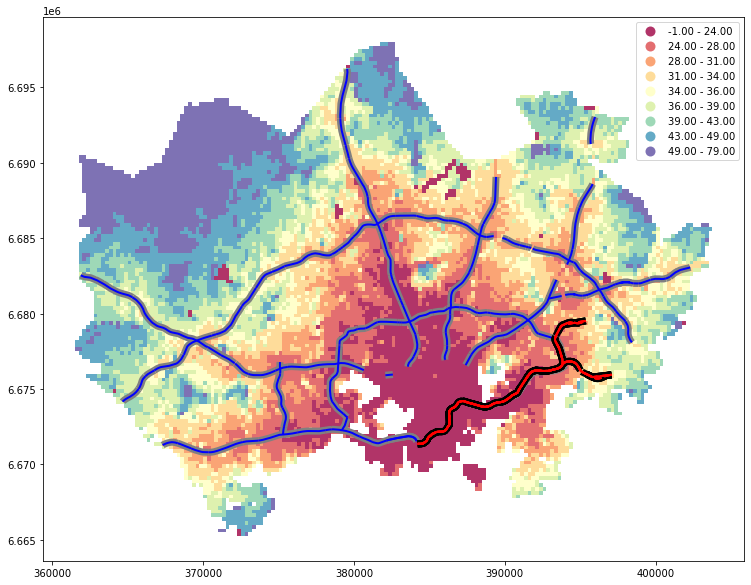

In [35]:
fig, ax = plt.subplots(figsize=(14, 10))

grid.plot(column='car_r_t', cmap='Spectral', scheme='Quantiles', k=9, alpha=0.8, ax=ax, legend=True)
roads.plot(ax=ax, edgecolor='grey', lw=7)
roads.plot(ax=ax, edgecolor='blue', lw=2)
metro.plot(ax=ax, edgecolor='black', lw=7, ls='--')
metro.plot(ax=ax, edgecolor='red', lw=2, ls='--')
out_fp = 'L5_data/static_map.png'
plt.savefig(out_fp, dpi=300)

<AxesSubplot:>

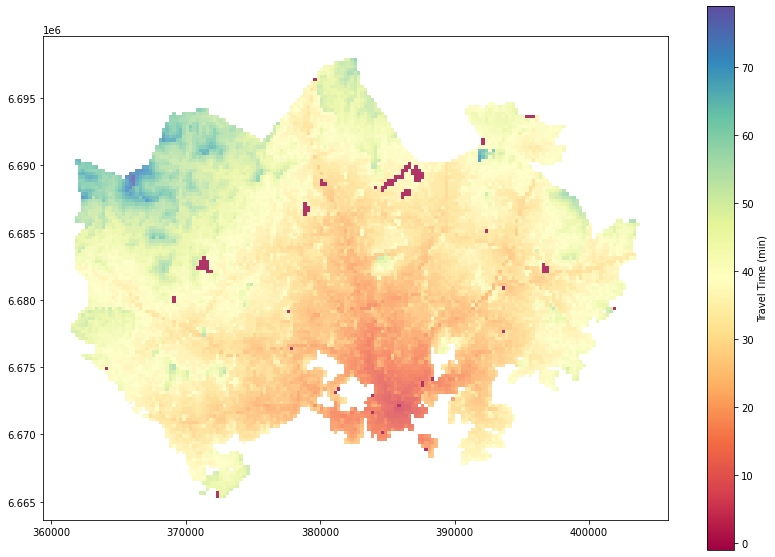

In [37]:
fig, ax = plt.subplots(figsize=(14, 10))
grid.plot(column='car_r_t', cmap='Spectral', alpha=0.8, ax=ax, legend=True, legend_kwds={'label': 'Travel Time (min)'})

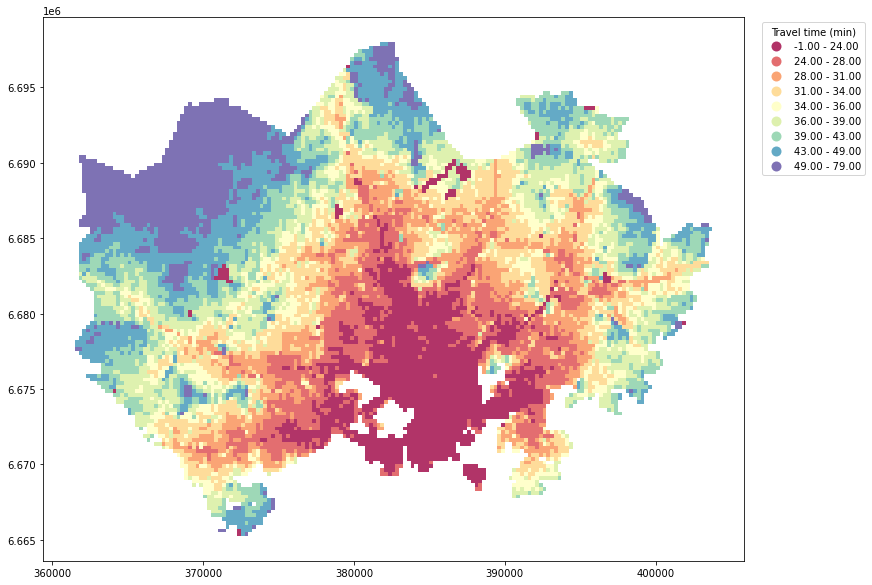

In [52]:
fig, ax = plt.subplots(figsize=(14, 10))
grid.plot(column='car_r_t', cmap='Spectral', scheme='Quantiles', k=9, alpha=0.8, ax=ax, legend=True)
ax.get_legend().set_title('Travel time (min)')
ax.get_legend().set_bbox_to_anchor((1.18, 1))

### Adding a base map

In [54]:
import contextily as ctx
%matplotlib inline

In [57]:
grid_fp = 'L5_data/TravelTimes_to_5975375_RailwayStation.shp'
grid = gpd.read_file(grid_fp)
grid.crs = CRS.from_epsg(3067)
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [58]:
print(grid.crs)

epsg:3067


In [59]:
data = grid.to_crs(epsg=3857)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [60]:
data.crs

{'init': 'epsg:3857', 'no_defs': True}

In [61]:
data.head(3)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((2767221.646 8489079.101, 2766716.966..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((2767726.329 8489095.521, 2767221.646..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((2768231.014 8489111.905, 2767726.329..."


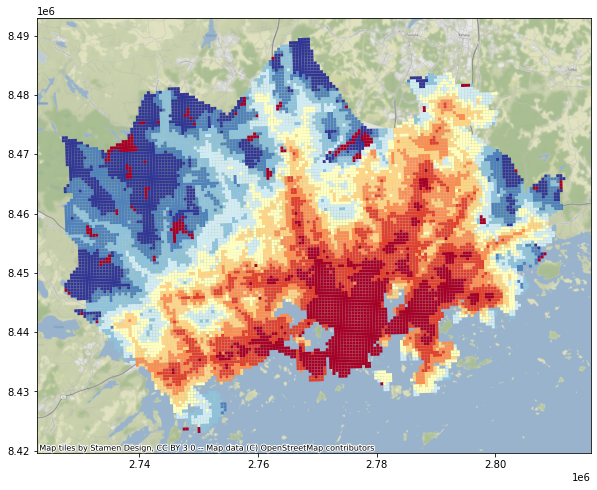

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(ax=ax, column='pt_r_tt', cmap='RdYlBu', scheme='Quantiles', k=9, alpha=0.6)

ctx.add_basemap(ax=ax, crs=data.crs)

In [69]:
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])


In [70]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

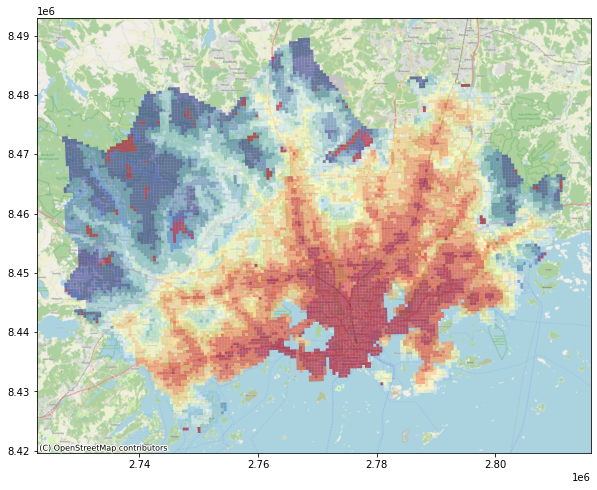

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(ax=ax, column='pt_r_tt', cmap='RdYlBu', scheme='Quantiles', k=9, alpha=0.6)

ctx.add_basemap(ax=ax, crs=data.crs, source=ctx.providers.OpenStreetMap.Mapnik)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 7
  Warn("Warning: setting k to %d" % k_q, UserWarning)


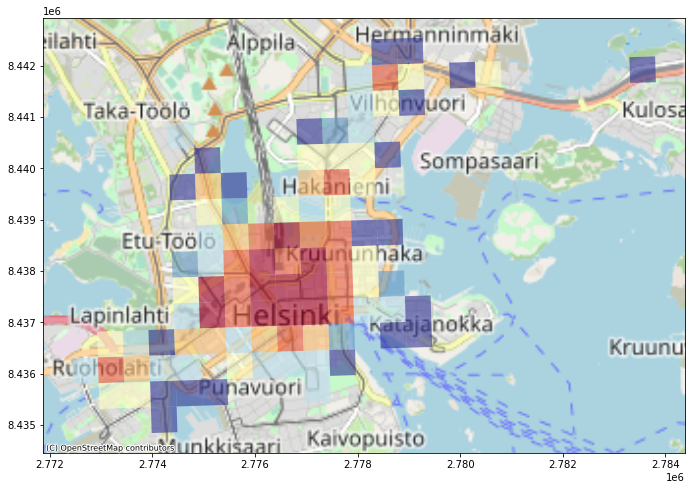

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

subset = data.loc[(data['pt_r_tt']>=0) & (data['pt_r_tt'] <= 15)]
subset.plot(ax=ax, column='pt_r_tt', cmap='RdYlBu', scheme='Quantiles', k=9, alpha=0.6)

ctx.add_basemap(ax=ax, crs=data.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

(8435000.0, 8442500.0)

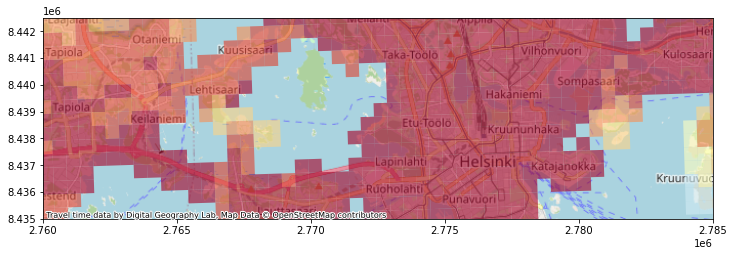

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

credits = 'Travel time data by Digital Geography Lab, Map Data © OpenStreetMap contributors'
# subset = data.loc[(data['pt_r_tt']>=0) & (data['pt_r_tt'] <= 15)]
data.plot(ax=ax, column='pt_r_tt', cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.6)
ctx.add_basemap(ax=ax, crs=data.crs, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)
ax.set_xlim(2760000, 2785000)
ax.set_ylim(8435000, 8442500)